In [46]:
#IMPORT

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets
import geocoder
import geopy
import folium

#FROM

from folium import plugins 
from vega_datasets import data as vds


In [47]:
df=pd.read_csv('./Data/33842.csv',sep=';')
df.head(175)

,Sexo,Provincias,Municipios,Edad (grupos quinquenales),Periodo,Total
0,Total,28 Madrid,"28001 Acebeda, La",De 0 a 4 años,1 de enero de 2021,0
1,Total,28 Madrid,"28001 Acebeda, La",De 5 a 9 años,1 de enero de 2021,1
2,Total,28 Madrid,"28001 Acebeda, La",De 10 a 14 años,1 de enero de 2021,1
3,Total,28 Madrid,"28001 Acebeda, La",De 15 a 19 años,1 de enero de 2021,1
4,Total,28 Madrid,"28001 Acebeda, La",De 20 a 24 años,1 de enero de 2021,1
...,...,...,...,...,...,...
170,Total,28 Madrid,28029 Cabanillas de la Sierra,De 10 a 14 años,1 de enero de 2021,50
171,Total,28 Madrid,28029 Cabanillas de la Sierra,De 15 a 19 años,1 de enero de 2021,48
172,Total,28 Madrid,28029 Cabanillas de la Sierra,De 20 a 24 años,1 de enero de 2021,41
173,Total,28 Madrid,28029 Cabanillas de la Sierra,De 25 a 29 años,1 de enero de 2021,34


In [48]:
df.Total.sum()

31930

In [49]:
df=df.rename(columns={'Edad (grupos quinquenales)':'Edad'})

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sexo        882 non-null    object
 1   Provincias  882 non-null    object
 2   Municipios  882 non-null    object
 3   Edad        882 non-null    object
 4   Periodo     882 non-null    object
 5   Total       882 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 41.5+ KB


In [51]:
len(df['Edad'].unique())

#Tenemos 21 grupos unicos de edad

21

In [52]:
# Cuales son esos grupos?

df['Edad'].unique()

array(['De 0 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años  ',
       'De 15 a 19 años  ', 'De 20 a 24 años', 'De 25 a 29 años',
       'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años',
       'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años',
       'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años  ',
       'De 75 a 79 años  ', 'De 80 a 84 años  ', 'De 85 a 89 años  ',
       'De 90 a 94 años  ', 'De 95 a 99 años  ', '100 y más años'],
      dtype=object)

In [53]:
# DF agrupado con la poblacion total por municipios.

df_1=df.groupby('Municipios')[['Edad','Total']].sum()
df_1=df_1.reset_index()





In [54]:
#Unificamos valores mayores de 65 renombrando el rango de edades.

df['Edad']=df.Edad.replace({'De 65 a 69 años':'Mayores_65',
                    'De 70 a 74 años  ':'Mayores_65',
                    'De 75 a 79 años  ':'Mayores_65',
                    'De 80 a 84 años  ':'Mayores_65',
                    'De 85 a 89 años  ':'Mayores_65',
                    'De 90 a 94 años  ':'Mayores_65',
                    'De 95 a 99 años  ':'Mayores_65',
                    '100 y más años':'Mayores_65'})
df['Edad'].unique()

array(['De 0 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años  ',
       'De 15 a 19 años  ', 'De 20 a 24 años', 'De 25 a 29 años',
       'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años',
       'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años',
       'De 60 a 64 años', 'Mayores_65'], dtype=object)

In [55]:
#Sumamos los mayores de 65 por municipios
df_2=df[(df.Edad =='Mayores_65')]
df_2

df_mayores_65=df_2.groupby('Municipios')[['Edad','Total']].sum()
#df_mayores_65=df_mayores_65.reset_index()

df_mayores_65

,Total
Municipios,
"28001 Acebeda, La",27
28003 Alameda del Valle,52
"28016 Atazar, El",22
28020 Berzosa del Lozoya,62
"28021 Berrueco, El",188
28024 Braojos,41
28027 Buitrago del Lozoya,371
28028 Bustarviejo,416
28029 Cabanillas de la Sierra,128


In [56]:
"""Unimos total de la poblacion y los mayores de 65 
para evaluar el % de mayores por municipio segun poblacion total"""


df_final=pd.merge(df_1,df_mayores_65,on='Municipios')
df_final=df_final.rename(columns={'Total_x':'Total_población',
                                  'Total_y':'Total_mayores_65'})
df_final['%_de_mayores_65']=round(df_final['Total_mayores_65']/df_final['Total_población']*100,2)

df_final.sort_values(by='Total_población',ascending=False,inplace=True)


df_final.head()

,Municipios,Total_población,Total_mayores_65,%_de_mayores_65
34,28151 Torrelaguna,4897,786,16.05
9,"28030 Cabrera, La",2782,490,17.61
7,28028 Bustarviejo,2701,416,15.40
38,28169 Venturada,2387,319,13.36
37,"28168 Vellón, El",2083,341,16.37


In [57]:
df_final_porcentaje_mayores_por_poblacion=df_final.sort_values(by='%_de_mayores_65',ascending=False)


In [58]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 34 to 0
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Municipios        42 non-null     object 
 1   Total_población   42 non-null     int64  
 2   Total_mayores_65  42 non-null     int64  
 3   %_de_mayores_65   42 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [59]:
#Totalizando los datos

print('Total poblacion:',
      df_final_porcentaje_mayores_por_poblacion.Total_población.sum())
print('Total Mayores de 65:',
      df_final_porcentaje_mayores_por_poblacion.Total_mayores_65.sum())

Total poblacion: 31930
Total Mayores de 65: 6050


# Visualization

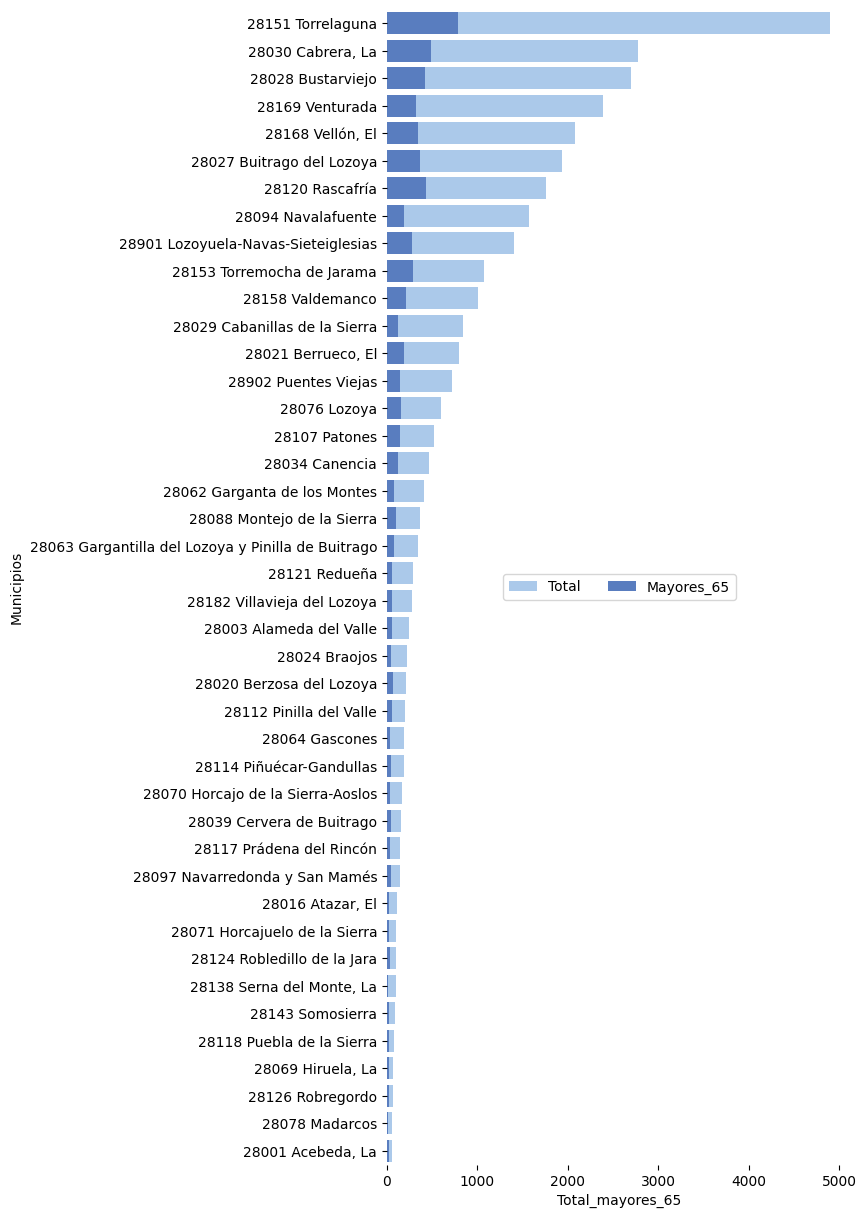

In [60]:
# Matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot del total poblacion por municipio
sns.set_color_codes("pastel")
sns.barplot(x="Total_población", y="Municipios", data=df_final,
            label="Total", color="b")

# Plot del total de mayores de 65
sns.set_color_codes("muted")
sns.barplot(x="Total_mayores_65", y="Municipios", data=df_final,
            label="Mayores_65", color="b")

# Add legend 
ax.legend(ncol=2, loc="center", frameon=True)
sns.despine(left=True, bottom=True)

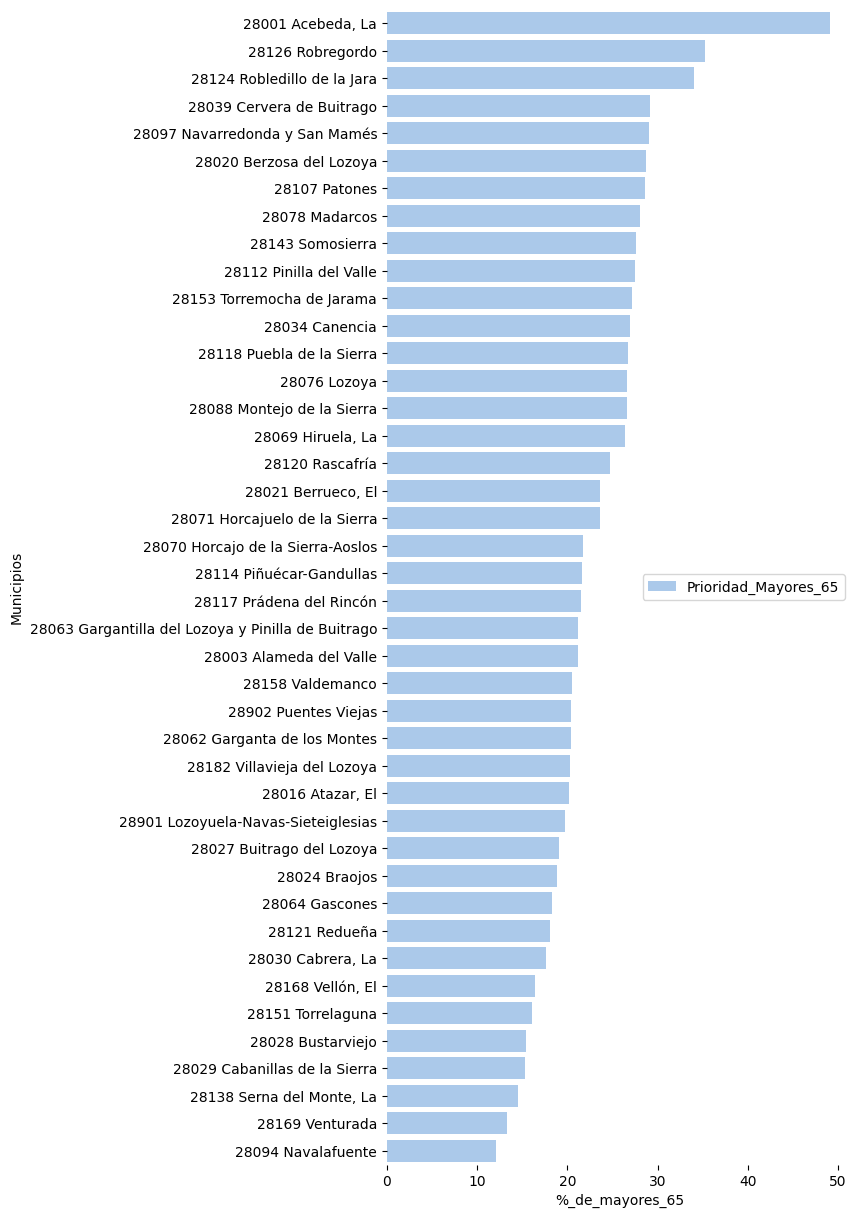

In [61]:
# Matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot municipios con mayor cantida de personas mayores 65
sns.set_color_codes("pastel")
sns.barplot(x="%_de_mayores_65", y="Municipios", data=df_final_porcentaje_mayores_por_poblacion,
            label="Prioridad_Mayores_65", color="b")


# Add legend and informative axis label
ax.legend(ncol=2, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)

In [62]:
df_final_porcentaje_mayores_por_poblacion.head(10)

,Municipios,Total_población,Total_mayores_65,%_de_mayores_65
0,"28001 Acebeda, La",55,27,49.09
31,28126 Robregordo,71,25,35.21
30,28124 Robledillo de la Jara,97,33,34.02
11,28039 Cervera de Buitrago,158,46,29.11
22,28097 Navarredonda y San Mamés,141,41,29.08
3,28020 Berzosa del Lozoya,216,62,28.70
23,28107 Patones,524,150,28.63
19,28078 Madarcos,57,16,28.07
33,28143 Somosierra,87,24,27.59
24,28112 Pinilla del Valle,196,54,27.55


In [63]:
municipios=df_final_porcentaje_mayores_por_poblacion['Municipios'].head(10)

latitud=[41.0930184542923,
         41.1217240545633,
         40.949178476438,
         40.9133961387403,
         41.0022608316099,
         40.973604970757,
         	40.8945406675332,
          	41.0365837796632,
           41.1397101420184,
           	40.9411659895241]

longitud=[-3.6201388451,
          -3.6029155704,
          -3.52977484618,
          -3.5189323451,
          -3.7213420391,
          -3.53245574777,
          -3.4811004746,
          -3.5750787424,
          -3.5779692085,
          -3.8338142728]

icon=[1,2,3,4,5,6,7,8,9,10]

df_map=pd.DataFrame()
df_map['Municipio']=municipios
df_map['Latitud']=latitud
df_map['Longitud']=longitud
df_map['Prioridad']=icon

df_map

,Municipio,Latitud,Longitud,Prioridad
0,"28001 Acebeda, La",41.093018,-3.620139,1
31,28126 Robregordo,41.121724,-3.602916,2
30,28124 Robledillo de la Jara,40.949178,-3.529775,3
11,28039 Cervera de Buitrago,40.913396,-3.518932,4
22,28097 Navarredonda y San Mamés,41.002261,-3.721342,5
3,28020 Berzosa del Lozoya,40.973605,-3.532456,6
23,28107 Patones,40.894541,-3.481100,7
19,28078 Madarcos,41.036584,-3.575079,8
33,28143 Somosierra,41.139710,-3.577969,9
24,28112 Pinilla del Valle,40.941166,-3.833814,10


In [64]:
#Municipios con prioridad
# map
map_enum_icons = folium.Map([40.965, -5.665], zoom_start=4)

# icons using plugins.BeautifyIcon
for i in df_map.itertuples():
    folium.Marker(location=[i.Latitud, i.Longitud],
                  popup=i.Municipio,
                  icon=plugins.BeautifyIcon(number=i.Prioridad,
                  border_color = "blue",
                  border_width=1,
                  text_color = "red",
                  inner_icon_style = "margin-top:0px;")).add_to(map_enum_icons)

# display map    
map_enum_icons

# Análisis de Población Hogares Unipersonales

In [65]:

Total_ESP={'Total_ESP':[47615034],
           'Total_Madrid':[6750336],
           'Total_Mayores_65_Madrid':[1213096],
           'Total_Hogares_Unipersonales_ESP':[4889900],
           'Total_Hogares_Uni_Mayores_65_ESP':[2131400],
           'Total_Hogares_Uni_Madrid':[675700],
           'Total_Hogares_Uni_Mayores_65_Madrid':[268100]}

dataframe=pd.DataFrame(Total_ESP)
dataframe

,Total_ESP,Total_Madrid,Total_Mayores_65_Madrid,Total_Hogares_Unipersonales_ESP,Total_Hogares_Uni_Mayores_65_ESP,Total_Hogares_Uni_Madrid,Total_Hogares_Uni_Mayores_65_Madrid
0,47615034,6750336,1213096,4889900,2131400,675700,268100


In [66]:
Per_Pob_Tot_Madrid = round((dataframe.Total_Madrid/dataframe.Total_ESP)*100,2)
Per_Pob_Tot_Madrid

0    14.18
dtype: float64

In [67]:
Per_Pob_Tot_Madrid_Mayores_65=round((dataframe.Total_Mayores_65_Madrid/dataframe.Total_Madrid)*100,2)
Per_Pob_Tot_Madrid_Mayores_65

0    17.97
dtype: float64

In [68]:
Per_Pob_Total_HogUni_Mayores_65_ESP=round((dataframe.Total_Hogares_Uni_Mayores_65_ESP/dataframe.Total_Hogares_Unipersonales_ESP)*100,2)
Per_Pob_Total_HogUni_Mayores_65_ESP

0    43.59
dtype: float64

In [69]:
Per_Pob_Total_HogUni_Mayores_65_Madrid=round((dataframe.Total_Hogares_Uni_Mayores_65_Madrid/dataframe.Total_Hogares_Uni_Madrid)*100,2)
Per_Pob_Total_HogUni_Mayores_65_Madrid

0    39.68
dtype: float64

In [70]:
df_mayores_65_2=df_mayores_65.reset_index()
df_mayores_65_2['Estimador']=round((df_mayores_65_2.Total)*0.39,0).astype(int)

df_mayores_65_2=df_mayores_65_2.sort_values(by='Estimador',ascending=False)

df_mayores_65_2.rename(columns={'Total':'Total_Mayores_de_65','Estimador':'Estimador_viviendo_solos'})

,Municipios,Total_Mayores_de_65,Estimador_viviendo_solos
34,28151 Torrelaguna,786,307
9,"28030 Cabrera, La",490,191
28,28120 Rascafría,434,169
7,28028 Bustarviejo,416,162
6,28027 Buitrago del Lozoya,371,145
37,"28168 Vellón, El",341,133
38,28169 Venturada,319,124
35,28153 Torremocha de Jarama,293,114
40,28901 Lozoyuela-Navas-Sieteiglesias,278,108
36,28158 Valdemanco,208,81


In [71]:
print(df_mayores_65_2.Total.sum())
print(df_mayores_65_2.Estimador.sum())

6050
2357


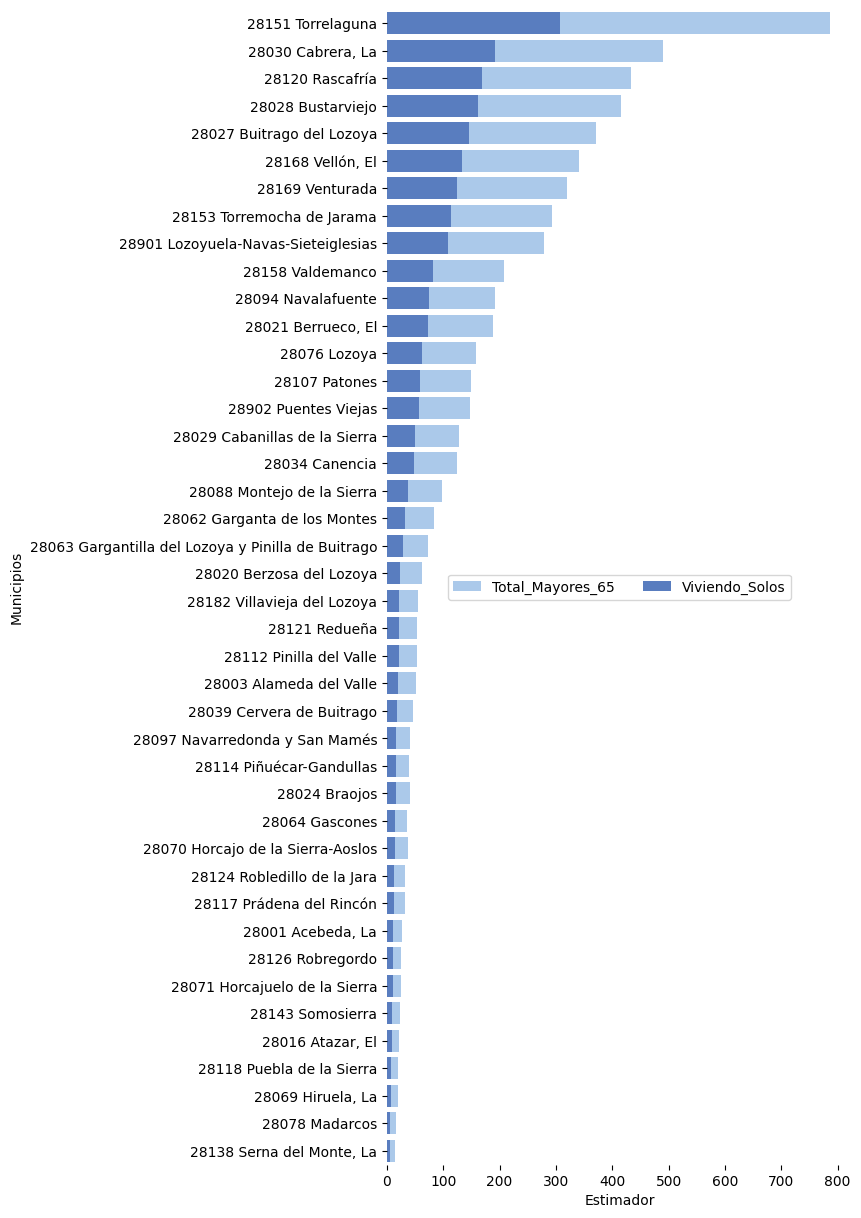

In [72]:
# Matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot del total poblacion por municipio
sns.set_color_codes("pastel")
sns.barplot(x="Total", y="Municipios", data=df_mayores_65_2,
            label="Total_Mayores_65", color="b")

# Plot del total de mayores de 65
sns.set_color_codes("muted")
sns.barplot(x="Estimador", y="Municipios", data=df_mayores_65_2,
            label="Viviendo_Solos", color="b")

# Add legend 
ax.legend(ncol=2, loc="center", frameon=True)
sns.despine(left=True, bottom=True)